<a href="https://colab.research.google.com/github/Elman295/binary_alpha_digits/blob/main/binary_alpha_digits_Quick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `binary_alpha_digits`


*   **Description**:

Binary 20x16 digits of '0' through '9' and capital 'A' through 'Z'. 39 examples
of each class.

*   **Homepage**:
    [https://cs.nyu.edu/~roweis/data/](https://cs.nyu.edu/~roweis/data/)

*   **Source code**:
    [`tfds.image_classification.BinaryAlphaDigits`](https://github.com/tensorflow/datasets/tree/master/tensorflow_datasets/image_classification/binary_alpha_digits.py)

*   **Versions**:

    *   **`1.0.0`** (default): No release notes.

*   **Download size**: `519.83 KiB`

*   **Dataset size**: `Unknown size`

*   **Auto-cached**
    ([documentation](https://www.tensorflow.org/datasets/performances#auto-caching)):
    Unknown

*   **Splits**:

Split     | Examples
:-------- | -------:
`'train'` | 1,404

*   **Feature structure**:

```python # `binary_alpha_digits`





*   **Description**:



Binary 20x16 digits of '0' through '9' and capital 'A' through 'Z'. 39 examples

of each class.



*   **Homepage**:

    [https://cs.nyu.edu/~roweis/data/](https://cs.nyu.edu/~roweis/data/)

In [36]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

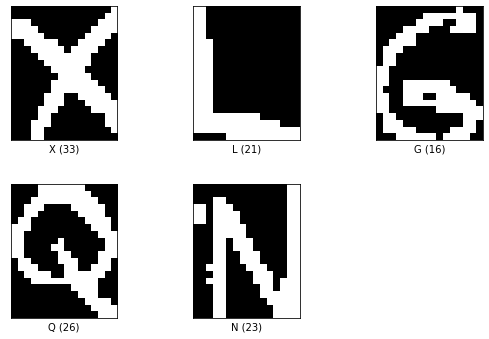

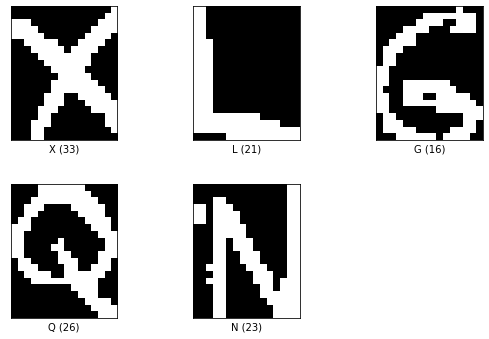

In [ ]:
data, info = tfds.load("binary_alpha_digits", split = "train", with_info=True)
samples = data.take(5)
tfds.show_examples(samples, info)

In [25]:
x_train,y_train = tfds.as_numpy(tfds.load("binary_alpha_digits", split = "train[:80%]", batch_size=-1, as_supervised=True))
x_test,y_test =tfds.as_numpy(tfds.load("binary_alpha_digits", split = "train[80%:]", batch_size=-1,as_supervised=True))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1123, 20, 16, 1)
(281, 20, 16, 1)
(1123,)
(281,)


In [26]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

# `Creating the model`

In [27]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32,(3,3),padding = "same", input_shape = (20,16,1),activation = "relu"),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64,(3,3),padding = "same",activation = "relu"),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = "relu"),
    tf.keras.layers.Dense(36, activation = "softmax")
    
])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 20, 16, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 18, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 9, 7, 32)          0         
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 7, 64)          18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 5, 64)          36928     
                                                      

# `Fitting the model`

In [29]:
model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = ["accuracy"]
)

In [30]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


36/36 [==============================] - 2s 45ms/step - loss: 3.3825 - accuracy: 0.0882
Epoch 2/20
36/36 [==============================] - 2s 45ms/step - loss: 2.2088 - accuracy: 0.3366
Epoch 3/20
36/36 [==============================] - 2s 44ms/step - loss: 1.6671 - accuracy: 0.4791
Epoch 4/20
36/36 [==============================] - 2s 45ms/step - loss: 1.2363 - accuracy: 0.6020
Epoch 5/20
36/36 [==============================] - 2s 44ms/step - loss: 1.0009 - accuracy: 0.6563
Epoch 6/20
36/36 [==============================] - 2s 44ms/step - loss: 0.8475 - accuracy: 0.7213
Epoch 7/20
36/36 [==============================] - 2s 44ms/step - loss: 0.6887 - accuracy: 0.7801
Epoch 8/20
36/36 [==============================] - 2s 44ms/step - loss: 0.5537 - accuracy: 0.8121
Epoch 9/20
36/36 [==============================] - 2s 45ms/step - loss: 0.5640 - accuracy: 0.8094
Epoch 10/20
36/36 [==============================] - 2s 44ms/step - loss: 0.5392 - accuracy: 0.8326
Epoch 11/20
36/36 [=

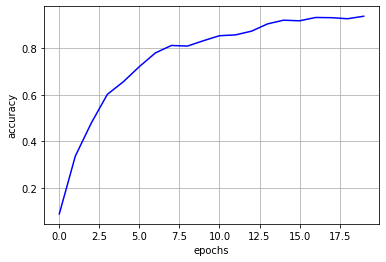

In [31]:
plt.plot(history.history["accuracy"], color = "blue")
plt.grid()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

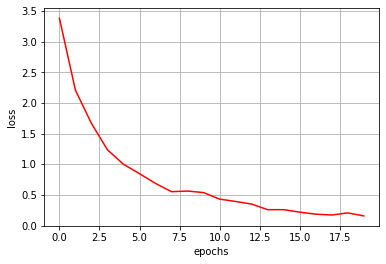

In [32]:
plt.plot(history.history["loss"], color = "red")
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [33]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 14ms/step - loss: 0.7457 - accuracy: 0.8185


[0.7457188367843628, 0.8185053467750549]

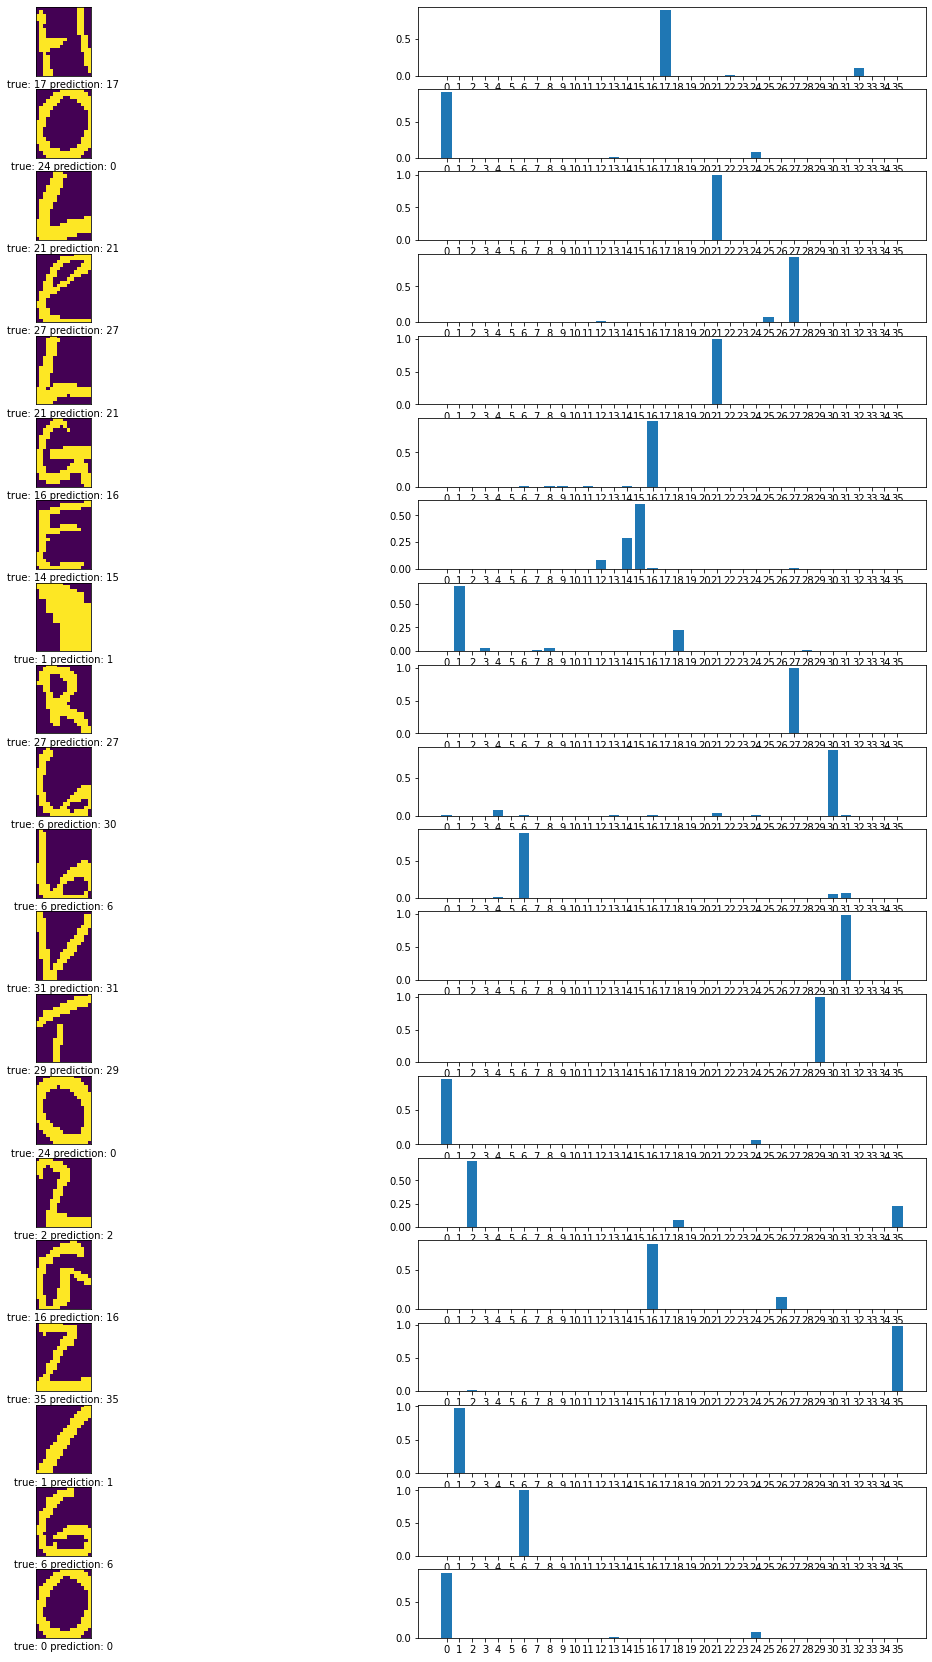

In [49]:
plt.figure(figsize = (20,30))

prediction = model(x_test)

x_test = x_test.reshape(281,20,16)

for i in range(20):
  plt.subplot(20,2,2*i+1)
  plt.imshow(x_test[i])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(f"true: {y_test[i]} prediction: {np.argmax(prediction[i])}")
  plt.subplot(20,2,2*i+2)
  plt.xticks(range(36))
  plt.bar(range(36), prediction[i])
  

plt.show()                 

In [50]:
model.save("binary_alpha_digits_quick.h5")